In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd  
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import glob  
import sys

In [5]:
from matplotlib import font_manager , rc
from matplotlib import style
style.use('ggplot')
%matplotlib inline
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)
plt.rc('axes', unicode_minus=False)

In [6]:
# 경로 안의 GJ_* 파일 합치기 
all_data = pd.DataFrame()
for f in glob.glob('C:/Users/jack1/AI2/ht/apt/GJ_*.xlsx'):
    df = pd.read_excel(f)  
    all_data = pd.concat([all_data, df])

# 파일저장  
all_data.to_excel("C:/Users/jack1/AI2/ht/apt/all.xlsx", header=True, index=False)

In [34]:
df = pd.read_excel("C:/Users/jack1/AI2/ht/apt/all.xlsx")
df.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일
0,광주광역시 광산구 도산동,1138-2,1138,2,대덕1,59.31,201610,15,"8,600",4,1990,송도로 143,NaN
1,광주광역시 광산구 도산동,1138-2,1138,2,대덕1,31.59,201704,27,"5,800",8,1990,송도로 143,NaN
2,광주광역시 광산구 도산동,1138-2,1138,2,대덕1,39.15,201704,28,"6,500",8,1990,송도로 143,NaN
3,광주광역시 광산구 도산동,1138-2,1138,2,대덕1,39.15,201706,6,"6,900",8,1990,송도로 143,NaN
4,광주광역시 광산구 도산동,1138-2,1138,2,대덕1,59.31,201706,27,"8,000",3,1990,송도로 143,NaN


In [35]:
# 번지 : 해당 땅에 부여된 번호
# 본번 : 해당 건물에 부여된 번호
# 부번 : 해당 건물에 부여된 부번호
# 도로명 : 해당 건물과 인접한 도로명
# 해제사유발생일 : 매매 계약이 해지된 날짜

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124637 entries, 0 to 124636
Data columns (total 13 columns):
시군구         124637 non-null object
번지          124637 non-null object
본번          124637 non-null int64
부번          124637 non-null int64
단지명         124637 non-null object
전용면적(㎡)     124637 non-null float64
계약년월        124637 non-null int64
계약일         124637 non-null int64
거래금액(만원)    124637 non-null object
층           124637 non-null int64
건축년도        124637 non-null int64
도로명         124637 non-null object
해제사유발생일     2040 non-null float64
dtypes: float64(2), int64(6), object(5)
memory usage: 12.4+ MB


In [37]:
df.isnull().sum(axis=0)

시군구              0
번지               0
본번               0
부번               0
단지명              0
전용면적(㎡)          0
계약년월             0
계약일              0
거래금액(만원)         0
층                0
건축년도             0
도로명              0
해제사유발생일     122597
dtype: int64

In [38]:
# 해제사유발생일을 통한 허위 매물 제거
df = df[ df['해제사유발생일'].isnull() ]

# 결측치 제거
df.drop(['해제사유발생일'],axis=1,inplace=True)
df.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명
0,광주광역시 광산구 도산동,1138-2,1138,2,대덕1,59.31,201610,15,"8,600",4,1990,송도로 143
1,광주광역시 광산구 도산동,1138-2,1138,2,대덕1,31.59,201704,27,"5,800",8,1990,송도로 143
2,광주광역시 광산구 도산동,1138-2,1138,2,대덕1,39.15,201704,28,"6,500",8,1990,송도로 143
3,광주광역시 광산구 도산동,1138-2,1138,2,대덕1,39.15,201706,6,"6,900",8,1990,송도로 143
4,광주광역시 광산구 도산동,1138-2,1138,2,대덕1,59.31,201706,27,"8,000",3,1990,송도로 143


In [39]:
# 시군구 정리
test = df['시군구'].str.split(" ",expand=True) # 시군구 분할
df['구'] = test.iloc[:,1] # '구' 열 추가
df['동'] = test.iloc[:,2] # '동' 열 추가
df.drop(["시군구"],axis=1,inplace=True) # 시군구 삭제
df.head()

,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,구,동
0,1138-2,1138,2,대덕1,59.31,201610,15,"8,600",4,1990,송도로 143,광산구,도산동
1,1138-2,1138,2,대덕1,31.59,201704,27,"5,800",8,1990,송도로 143,광산구,도산동
2,1138-2,1138,2,대덕1,39.15,201704,28,"6,500",8,1990,송도로 143,광산구,도산동
3,1138-2,1138,2,대덕1,39.15,201706,6,"6,900",8,1990,송도로 143,광산구,도산동
4,1138-2,1138,2,대덕1,59.31,201706,27,"8,000",3,1990,송도로 143,광산구,도산동


In [40]:
# 거래금액 float형 변환 (특수 문자 제거)
df['거래금액(만원)'] = df['거래금액(만원)'].str.replace(pat=r'[^\w]', repl=r'', regex=True).astype("float")
df.head()

,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,구,동
0,1138-2,1138,2,대덕1,59.31,201610,15,8600.0,4,1990,송도로 143,광산구,도산동
1,1138-2,1138,2,대덕1,31.59,201704,27,5800.0,8,1990,송도로 143,광산구,도산동
2,1138-2,1138,2,대덕1,39.15,201704,28,6500.0,8,1990,송도로 143,광산구,도산동
3,1138-2,1138,2,대덕1,39.15,201706,6,6900.0,8,1990,송도로 143,광산구,도산동
4,1138-2,1138,2,대덕1,59.31,201706,27,8000.0,3,1990,송도로 143,광산구,도산동


In [41]:
# 면적당 가격 계산
df['면적(㎡)당 가격'] = round(df['거래금액(만원)'] / df['전용면적(㎡)']).astype("int")
df.head()

,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,구,동,면적(㎡)당 가격
0,1138-2,1138,2,대덕1,59.31,201610,15,8600.0,4,1990,송도로 143,광산구,도산동,145
1,1138-2,1138,2,대덕1,31.59,201704,27,5800.0,8,1990,송도로 143,광산구,도산동,184
2,1138-2,1138,2,대덕1,39.15,201704,28,6500.0,8,1990,송도로 143,광산구,도산동,166
3,1138-2,1138,2,대덕1,39.15,201706,6,6900.0,8,1990,송도로 143,광산구,도산동,176
4,1138-2,1138,2,대덕1,59.31,201706,27,8000.0,3,1990,송도로 143,광산구,도산동,135


In [42]:
df["번지"].nunique(), df["본번"].nunique(), df["부번"].nunique(), df["도로명"].nunique(),df["단지명"].nunique()

(1028, 710, 60, 1152, 912)

In [43]:
df["구"].nunique(), df["동"].nunique()

(5, 83)

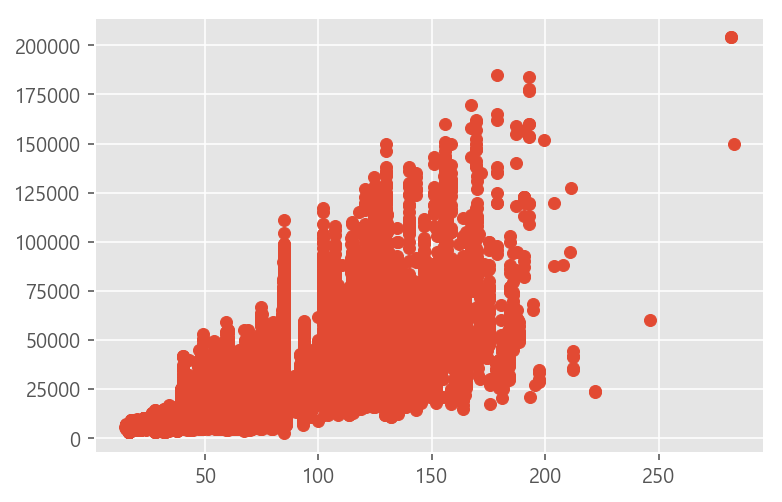

In [44]:
plt.scatter(df['전용면적(㎡)'], df['거래금액(만원)'] )

In [45]:
# 지나치게 적은 분포
df[ df["전용면적(㎡)"] > 200 ].shape

(16, 14)

In [46]:
mask = df[ df["전용면적(㎡)"] > 200 ].index
df.drop(mask, axis=0, inplace=True)

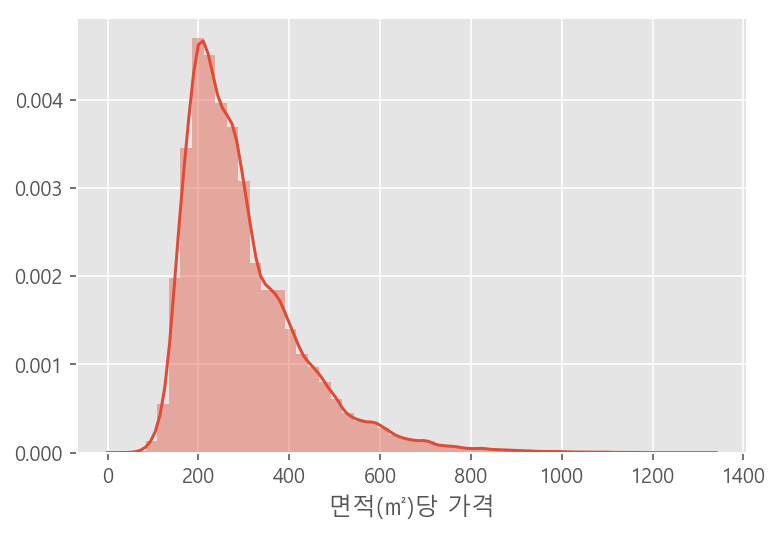

In [47]:
sns.distplot( df['면적(㎡)당 가격'] )

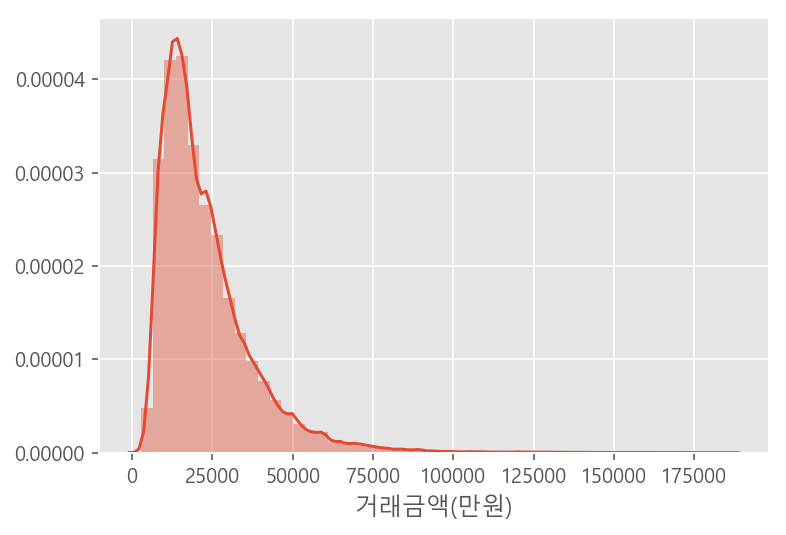

In [48]:
sns.distplot( df['거래금액(만원)'] )

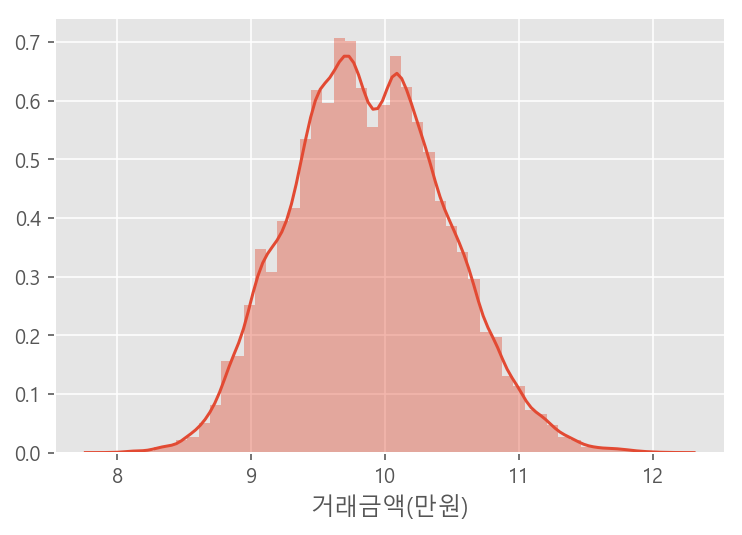

In [49]:
sns.distplot( np.log1p(df['거래금액(만원)']) )

In [50]:
df['거래금액'] = np.log1p(df['거래금액(만원)'])
df.head()

,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,구,동,면적(㎡)당 가격,거래금액
0,1138-2,1138,2,대덕1,59.31,201610,15,8600.0,4,1990,송도로 143,광산구,도산동,145,9.059634
1,1138-2,1138,2,대덕1,31.59,201704,27,5800.0,8,1990,송도로 143,광산구,도산동,184,8.665786
2,1138-2,1138,2,대덕1,39.15,201704,28,6500.0,8,1990,송도로 143,광산구,도산동,166,8.779711
3,1138-2,1138,2,대덕1,39.15,201706,6,6900.0,8,1990,송도로 143,광산구,도산동,176,8.839422
4,1138-2,1138,2,대덕1,59.31,201706,27,8000.0,3,1990,송도로 143,광산구,도산동,135,8.987322


In [51]:
# 아파트 층수가 가격에 유의미한수치가 있는가?
# https://blog.naver.com/together_sh/222468508377
# 중간층이 가장 인기가 많고 비싸다

In [52]:
# 모델
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [53]:
def get_rmse(model):
    pred = model.predict(x_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [54]:
X = df.drop(['거래금액(만원)','거래금액','면적(㎡)당 가격','계약일','번지','본번','부번','단지명','도로명'],axis=1)
x = pd.get_dummies(X)
y = df['거래금액']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

tree_reg = RandomForestRegressor(random_state=0).fit(x_train, y_train)
lr_reg = LinearRegression().fit(x_train, y_train)
ridge_reg = Ridge().fit(x_train, y_train)
lasso_reg = Lasso().fit(x_train, y_train)

get_rmses( [tree_reg, lr_reg, ridge_reg, lasso_reg] )

RandomForestRegressor 로그 변환된 RMSE: 0.083
LinearRegression 로그 변환된 RMSE: 0.235
Ridge 로그 변환된 RMSE: 0.235
Lasso 로그 변환된 RMSE: 0.308


[0.08302161254347297,
 0.2348838557517335,
 0.23488884502876223,
 0.3077237753064727]

In [55]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
  grid_search = GridSearchCV(model, param_grid=params, 
                             scoring='neg_mean_squared_error', cv=5)
  grid_search.fit(x, y)
  rmse = np.sqrt( -1 * grid_search.best_score_ )
  print(f'{model.__class__.__name__} CV RMSE AVG: {rmse:.3f},',
        f' Params: {grid_search.best_params_}')
  return grid_search.best_estimator_

In [56]:
param_ridge = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
param_lasso = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
ridge_reg = print_best_params(ridge_reg, param_ridge)
lasso_reg = print_best_params(lasso_reg, param_lasso)

Ridge CV RMSE AVG: 0.243,  Params: {'alpha': 10}
Lasso CV RMSE AVG: 0.250,  Params: {'alpha': 0.001}


In [57]:
get_rmses( [ridge_reg, lasso_reg] )

Ridge 로그 변환된 RMSE: 0.235
Lasso 로그 변환된 RMSE: 0.245


[0.23477482682373532, 0.24533040547099044]

In [58]:
pred_ridge = ridge_reg.predict(x_test)
pred_lasso = lasso_reg.predict(x_test)

pred = (0.6 * pred_ridge) + (0.4 * pred_lasso)
rmse = np.sqrt( mean_squared_error(y_test, pred) )
rmse

0.2366759810203145

In [59]:
import pickle
# my_regressor 객체 저장.
with open("my_regressor.pkl","wb") as f:
    pickle.dump(tree_reg, f)

# my_scaler 객체 저장.
with open("my_scaler.pkl","wb") as f:
    pickle.dump(x, f)

In [60]:
x

,전용면적(㎡),계약년월,층,건축년도,구_광산구,구_남구,구_동구,구_북구,구_서구,동_각화동,...,동_진월동,동_충장로4가,동_치평동,동_풍암동,동_풍향동,동_하남동,동_학동,동_행암동,동_화정동,동_흑석동
0,59.3100,201610,4,1990,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,31.5900,201704,8,1990,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,39.1500,201704,8,1990,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,39.1500,201706,8,1990,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,59.3100,201706,3,1990,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,59.3100,201707,10,1990,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,39.1500,201708,7,1990,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,39.1500,201709,10,1990,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,84.9800,201610,12,2000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,84.9800,201610,3,2000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
x.columns

Index(['전용면적(㎡)', '계약년월', '층', '건축년도', '구_광산구', '구_남구', '구_동구', '구_북구', '구_서구',
       '동_각화동', '동_계림동', '동_광천동', '동_금남로2가', '동_금남로3가', '동_금남로5가', '동_금호동',
       '동_내방동', '동_노대동', '동_농성동', '동_대인동', '동_도산동', '동_도천동', '동_동림동', '동_동명동',
       '동_동천동', '동_두암동', '동_마륵동', '동_매곡동', '동_매월동', '동_문흥동', '동_방림동', '동_백운동',
       '동_본촌동', '동_봉선동', '동_북동', '동_비아동', '동_사동', '동_산수동', '동_산월동', '동_산정동',
       '동_삼각동', '동_서동', '동_선암동', '동_소촌동', '동_소태동', '동_송정동', '동_송하동', '동_수기동',
       '동_수완동', '동_신가동', '동_신안동', '동_신용동', '동_신창동', '동_신촌동', '동_쌍암동', '동_쌍촌동',
       '동_양동', '동_양림동', '동_양산동', '동_연제동', '동_오치동', '동_용두동', '동_용봉동', '동_용산동',
       '동_우산동', '동_운남동', '동_운림동', '동_운수동', '동_운암동', '동_월계동', '동_월곡동', '동_월남동',
       '동_월산동', '동_유촌동', '동_일곡동', '동_임동', '동_임암동', '동_장덕동', '동_주월동', '동_중흥동',
       '동_지산동', '동_지석동', '동_진월동', '동_충장로4가', '동_치평동', '동_풍암동', '동_풍향동',
       '동_하남동', '동_학동', '동_행암동', '동_화정동', '동_흑석동'],
      dtype='object')

In [64]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
